In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics.pairwise import euclidean_distances
from yellowbrick.target import FeatureCorrelation

In [27]:
tracks = pd.read_csv('spotify_data.csv')
tracks['genre'] = tracks['genre'].str.strip().str.lower()

In [28]:
tracks.drop_duplicates(subset=['track_name', 'artist_name'], inplace=True)
tracks.dropna()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [29]:
# features for clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_ms', 'time_signature']

#### Feature correlation with popularity

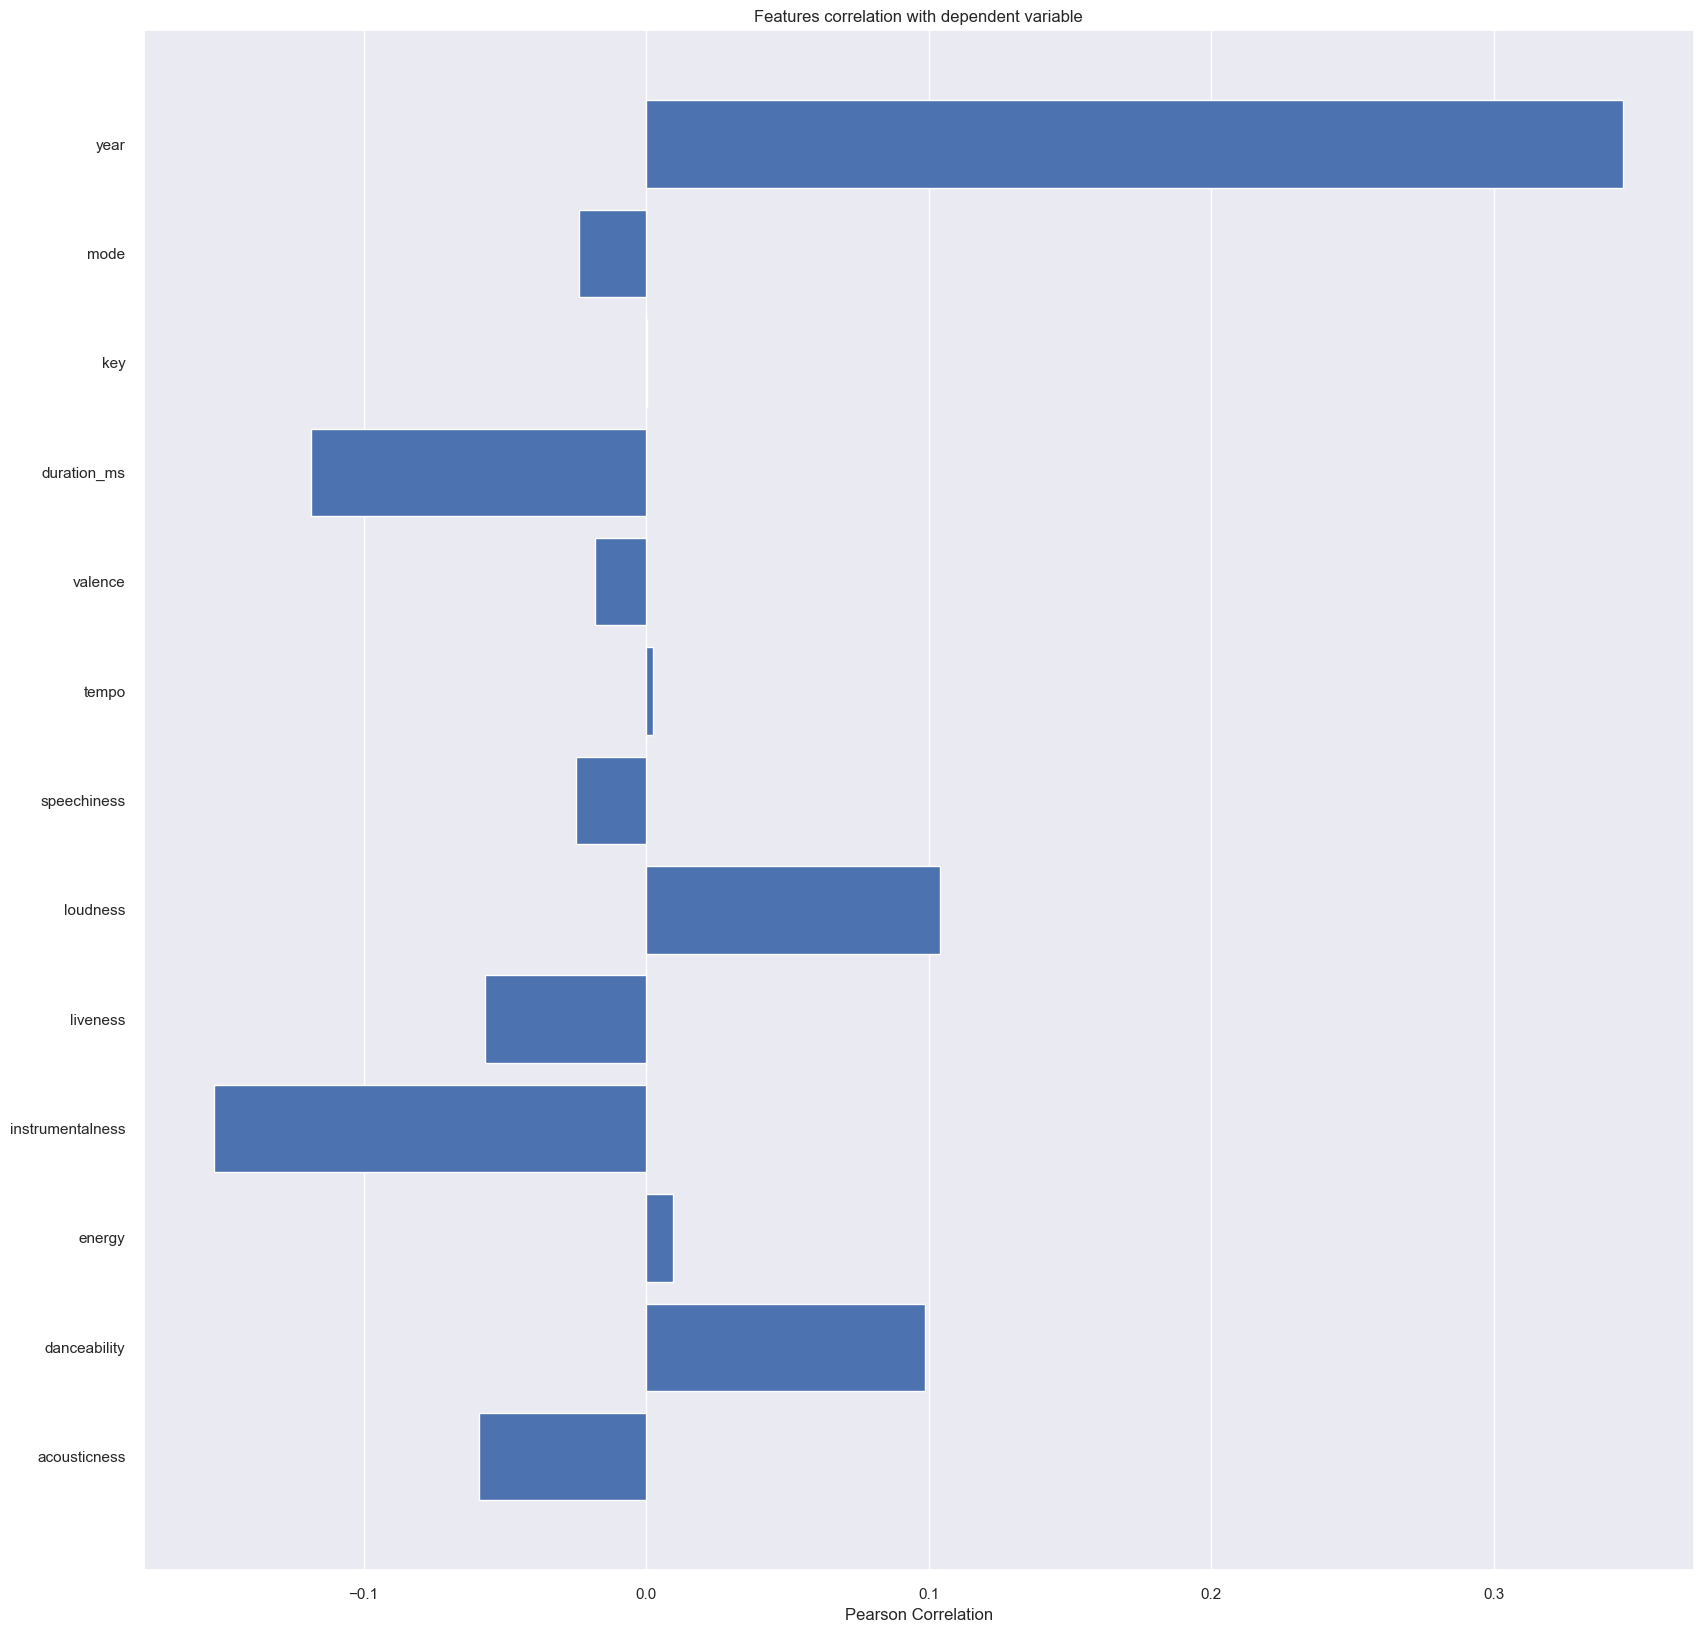

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [30]:
numericFeatures = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'key', 'mode', 'year']
X, y = tracks[numericFeatures], tracks['popularity']

features = np.array(numericFeatures)
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)
visualizer.show()

#### Music over time

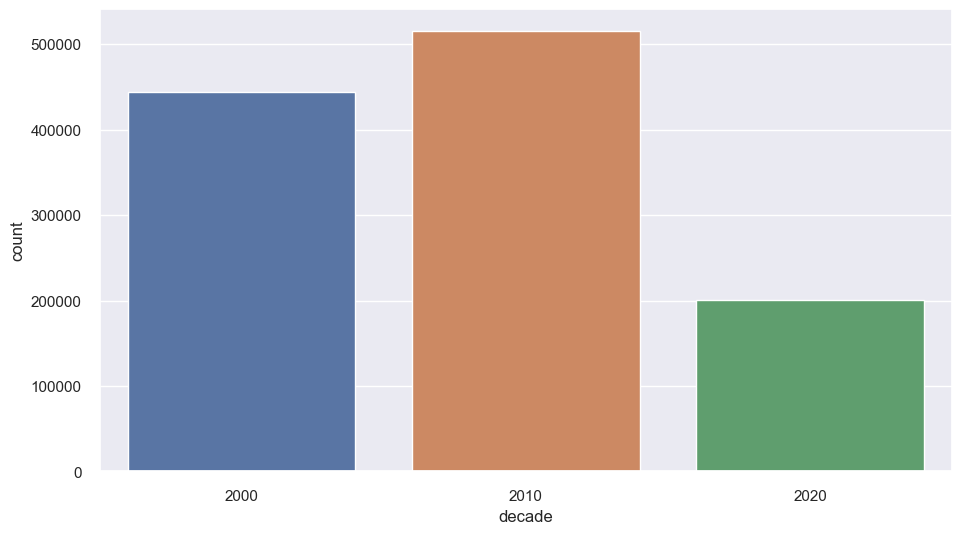

In [31]:
def getDecade(year):
    decade = int(year / 10) * 10
    return decade

tracks['decade'] = tracks['year'].apply(getDecade)


sns.set(rc={'figure.figsize':(11,6)})
sns.countplot(x='decade', data=tracks)

plt.show()

In [32]:
# sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
# fig = px.line(tracks, x='year', y=sound_features)
# fig.show()

In [33]:
mean_metrics = tracks.nlargest(10, 'popularity')[['genre', 'valence', 'energy', 'danceability', 'acousticness']].groupby('genre').mean().reset_index()

fig = px.bar(mean_metrics, x='genre', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title="Average Metrics for Top 3 Genres")
fig.update_layout(yaxis_title="Metrics", xaxis_title="Genre", legend_title="Metrics")
fig.show()

In [34]:
# standardize feature cols
scaler = StandardScaler()
scaledTracks = scaler.fit_transform(tracks[features])

In [35]:
kmeans = KMeans(n_clusters=10, random_state=42)
tracks['cluster'] = kmeans.fit_predict(scaledTracks)

print(tracks.head())

   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy  key  ...  speechiness  \
0          68  2012  acoustic         0.483   0.303    4  ...       0.0429   
1          50  2012  acoustic         0.572   0.454    3  ...       0.0258   
2          57  2012  acoustic         0.409   0.234    3  ...       0.0323   
3          58  2012  acoustic         0.392   0.251   10  ...       0.0363   
4          54  2012  acoustic         0.430   0.791    6  ...       0.0302   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       

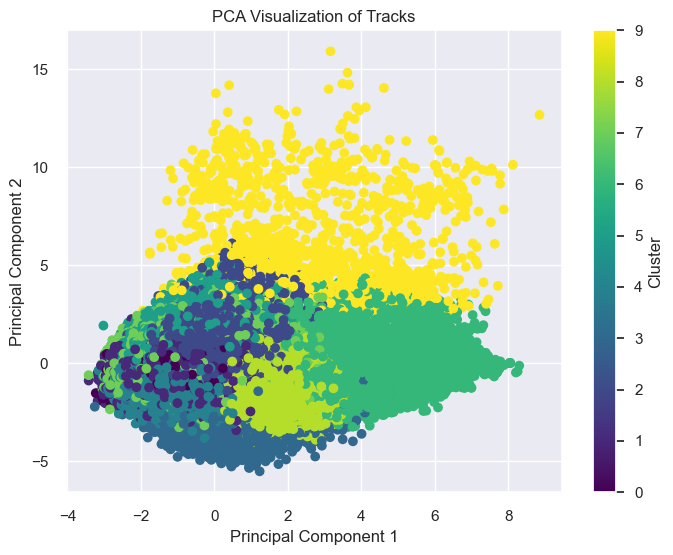

In [36]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaledTracks)

Df = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([Df, tracks[['cluster']]], axis=1)

plt.figure(figsize=(8,6))
plt.scatter(Df['principal component 1'], Df['principal component 2'], c=tracks['cluster'].values, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.title('PCA Visualization of Tracks')

plt.show()


In [41]:
clusterAnalysis = tracks.groupby('cluster')['genre'].unique()

# for cluster, genres in clusterAnalysis.items():
#     print(f"cluster {cluster}: {genres}")

In [39]:
def recommendSongs(inputTrackName, inputArtistName, tracks, features, scaler, kmeans, n_recommendations=5):
    inputTrackName = inputTrackName.strip().lower()
    inputArtistName = inputArtistName.strip().lower()
    
    # find input track
    inputTrack = tracks[(tracks['track_name'].str.lower() == inputTrackName) & (tracks['artist_name'].str.lower() == inputArtistName)]
    
    if inputTrack.empty:
        print("Track not found in dataset")
        return inputTrack 
    print("Input track found:")
    print(inputTrack)
    
    inputTrackFeatures = inputTrack[features]
    scaledInputTrackFeatures = scaler.transform(inputTrackFeatures)
    
    # predict cluster for the input track
    inputCluster = kmeans.predict(scaledInputTrackFeatures)[0]
    print(f"Predicted cluster: {inputCluster}")
    
    # get tracks from same cluster
    similarTracks = tracks[tracks['cluster'] == inputCluster]
    # exclude input track from recommendations
    similarTracks = similarTracks[(similarTracks['track_name'].str.lower() != inputTrackName) | (similarTracks['artist_name'].str.lower() != inputArtistName)]
    
    # calculate the distances to input track
    similarTracksFeatures = scaler.transform(similarTracks[features])
    distances = euclidean_distances(scaledInputTrackFeatures, similarTracksFeatures).flatten()
    # add distances to the df
    similarTracks['distance'] = distances
    
    # sort by distance and select top 5
    recommendations = similarTracks.sort_values(by=['distance', 'popularity'], ascending=[True, False]).drop_duplicates(subset=['artist_name', 'track_name']).head(n_recommendations)
    if len(recommendations) < n_recommendations:
        # fill remaining recommendations with similar tracks if duplicates
        remaining = similarTracks[~similarTracks.index.isin(recommendations.index)].head(n_recommendations - len(recommendations))
        recommendations = pd.concat([recommendations, remaining])
    
    return recommendations[['artist_name', 'track_name', 'popularity', 'genre', 'year']]

# get user input
inputTrackName = input("Enter track name: ")
inputArtistName = input("Enters artist name: ")

# get recommendations
recommendations = recommendSongs(inputTrackName, inputArtistName, tracks, features, scaler, kmeans)
if recommendations.empty:
    print("No recommendations found")
else:
    print("Here are the top recommendations based on the inputted song:")
    print(recommendations[['artist_name', 'track_name', 'popularity', 'genre', 'year']])


Input track found:
        Unnamed: 0 artist_name track_name                track_id  popularity  \
461992      461992  The Weeknd  Heartless  6bnF93Rx87YqUBLSgjiMU8          84   

        year genre  danceability  energy  key  ...  speechiness  acousticness  \
461992  2020   pop         0.537   0.746   10  ...         0.15        0.0236   

        instrumentalness  liveness  valence    tempo  duration_ms  \
461992          0.000001     0.156    0.252  170.062       198267   

        time_signature  decade  cluster  
461992               4    2020        1  

[1 rows x 22 columns]
Predicted cluster: 1
Here are the top recommendations based on the inputted song:
             artist_name                               track_name  popularity  \
447065  The Crabb Family             Sister, Play That Tambourine          11   
401192             ATEEZ  HALA HALA (Hearts Awakened, Live Alive)          60   
492367         Millbrook                   You & Me (feat. Selin)          26   
427